### Plot faculty hiring distribution by city

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)
from postdocsalary.paths import save_fig, FIGURE_DIR

In [19]:
CBSA_df = pd.read_pickle(DATA_DIR / 'city_hiring.pickle')

In [20]:
CBSA_df[:3]

,CBSA_NAME,RPP_all,total_hires,prop_hires,cum_hires,n_uni,n_grad,prop_grad,cum_grad,hiring_grad_disparity
2,"Boston-Cambridge-Newton, MA-NH",115.5,1604.0,0.115679,0.115679,10,2325.0,0.059061,0.059061,1.958626
0,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,919.0,0.066277,0.181956,6,1506.0,0.038256,0.097317,1.732450
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7,854.0,0.061589,0.243545,5,1268.0,0.032211,0.129528,1.912092


In [21]:
import seaborn as sns

In [22]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

### Top cities by RPP

In [23]:
nex = 10
top_n = len(CBSA_df)

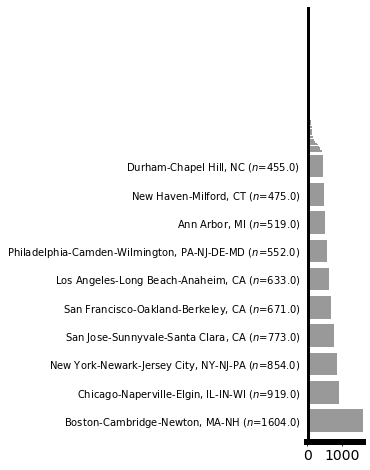

In [24]:
xlim = [0, 1600]

sort_mask = np.argsort(CBSA_df["total_hires"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(1, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
y = CBSA_df["total_hires"].values[sort_mask][nex:top_n]
ax.barh(
    np.arange(len(CBSA_df))[nex:top_n],
    y,
    color=[pal[8] if np.sign(i) > 0 else pal[8] for i in y],
)
ax.axvline(0, color='k', lw=6)

ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = CBSA_df["total_hires"].values[sort_mask][:nex]
ax.barh(
    np.arange(len(CBSA_df))[:nex] + 1,
    y,
    color=[pal[8] if np.sign(i) > 0 else pal[8] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if True:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            CBSA_df["CBSA_NAME"].values[sort_mask][:nex],
            CBSA_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(CBSA_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(6)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
ax.axvline(0, color='k', lw=6)
save_fig(FIGURE_DIR / 'city_hires')

### RPP

In [31]:
np.min(CBSA_df['RPP_all'])

83.2

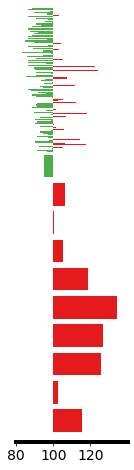

In [34]:
sort_mask = np.argsort(CBSA_df["total_hires"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
y = CBSA_df["RPP_all"].values[sort_mask][nex:top_n] - 100
ax.barh(
    np.arange(len(CBSA_df))[nex:top_n],
    y,
    color=[pal[0] if np.sign(i) > 0 else pal[2] for i in y],
)
ax.set_xlim([-20, 40])
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])
#ax.axvline(0, color='k', lw=3)

ax = axs[1]
y = CBSA_df["RPP_all"].values[sort_mask][:nex] - 100
ax.barh(
    np.arange(len(CBSA_df))[:nex] + 1,
    y,
    color=[pal[0] if np.sign(i) > 0 else pal[2] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim([-20, 40])
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            CBSA_df["CBSA_NAME"].values[sort_mask][:nex],
            CBSA_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(CBSA_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_xticks([-20, 0, 20])
#ax.axvline(0, color='k', lw=3)
ax.set_xticklabels(['80', '100', '120'])
save_fig(FIGURE_DIR / 'city_RPP')

### Top cities by hires

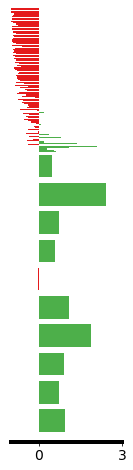

In [30]:
xlim = [-1, 3]
metric = "hiring_grad_disparity"
sort_mask = np.argsort(CBSA_df["total_hires"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
#ax.axvline(0, color='k', lw=3)

y = CBSA_df[metric].values[sort_mask][nex:top_n]-1
ax.barh(
    np.arange(len(CBSA_df))[nex:top_n],
    y,
    color=[pal[2] if i > 0 else pal[0] for i in y],
)
ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = CBSA_df[metric].values[sort_mask][:nex] -1
ax.barh(
    np.arange(len(CBSA_df))[:nex] + 1,
    y,
    color=[pal[2] if i > 0 else pal[0] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            CBSA_df["CBSA_NAME"].values[sort_mask][:nex],
            CBSA_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])

    
# ax.set_yticklabels(CBSA_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
#ax.axvline(0, color='k', lw=3)
ax.set_xticks([0,3])
save_fig(FIGURE_DIR / 'city_hiring_disparity')